# CNN model to identify the expression given the face

## Performance Comparions of the models I built

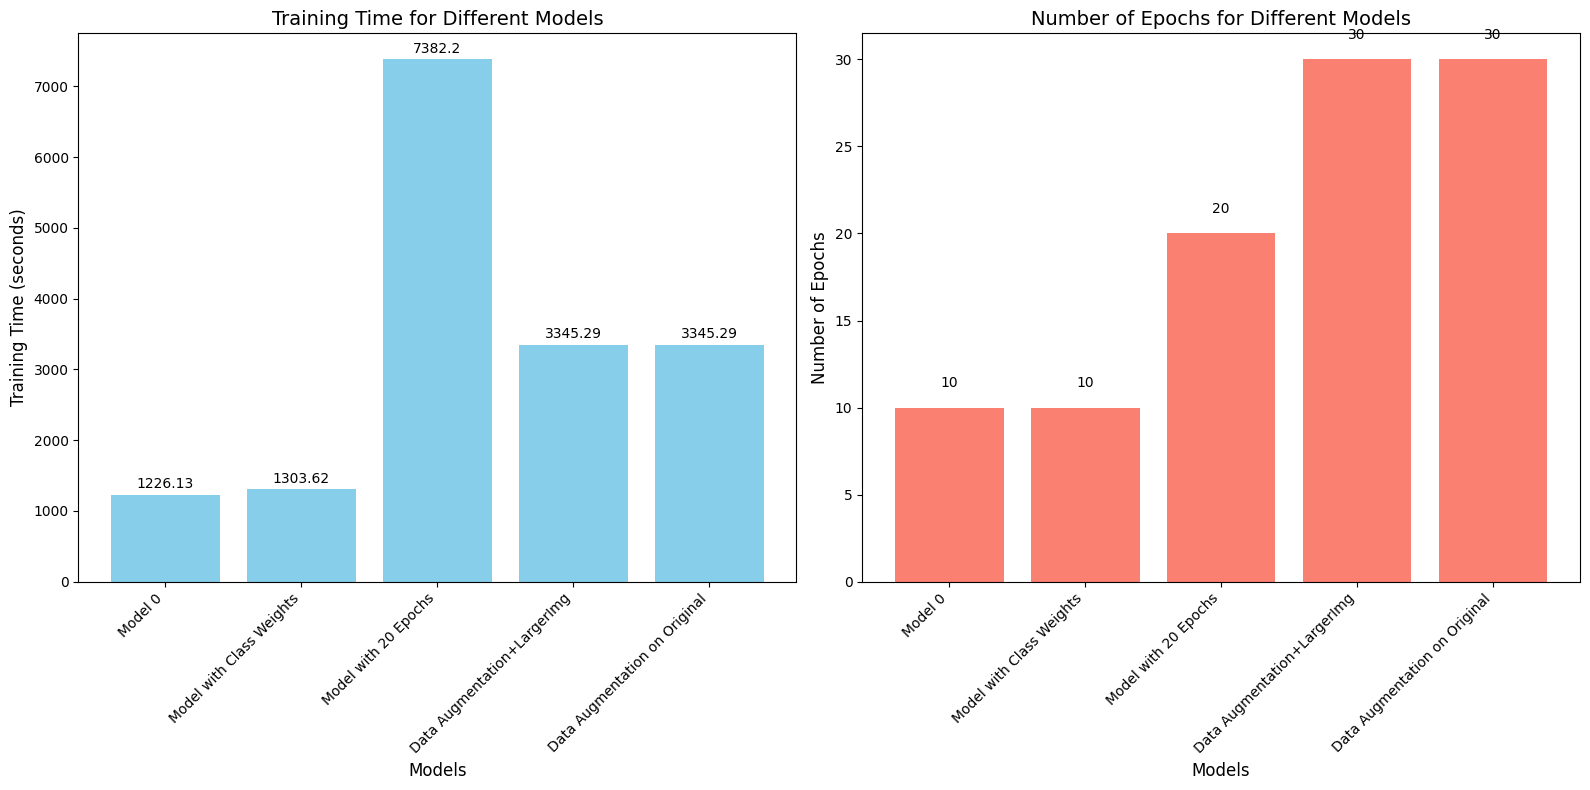

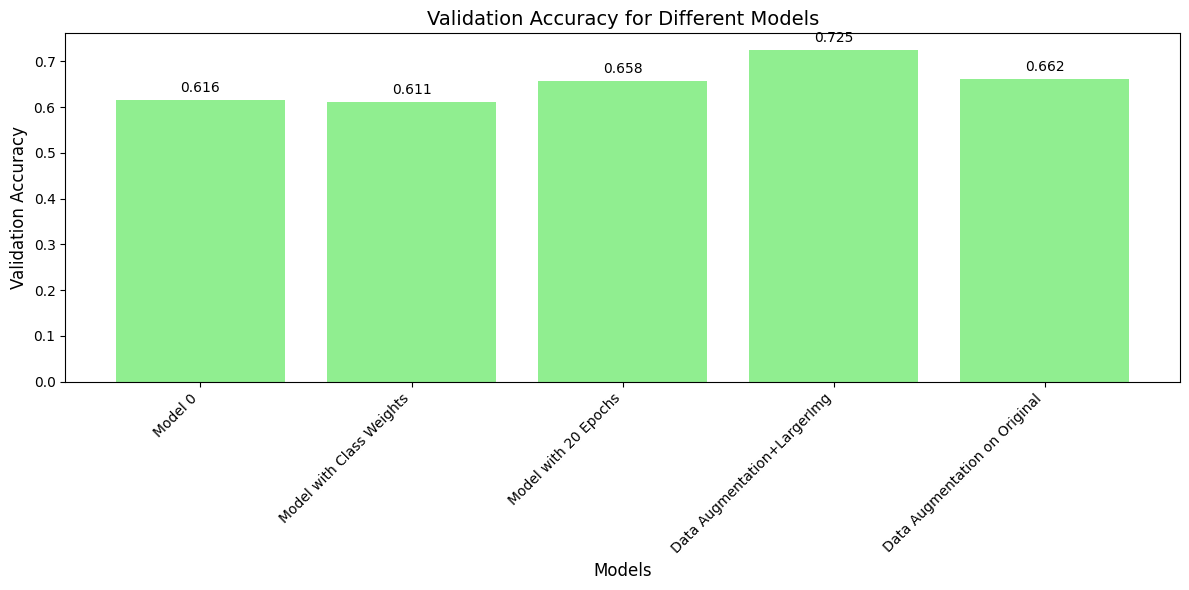

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Model 0', 'Model with Class Weights', 'Model with 20 Epochs', 'Data Augmentation+LargerImg', 'Data Augmentation on Original']
training_times = [1226.13, 1303.62, 7382.20, 3345.29, 3345.29]  # Replace None with 0 for training time
epochs = [10, 10, 20, 30, 30]  # Replace None with 0 for epochs
validation_accuracies = [0.616, 0.611, 0.658, 0.725, 0.662]

# Set the x locations for the groups
index = np.arange(len(models))

# Plot Training Time and Epochs
plt.figure(figsize=(16, 8))

# Training Time
plt.subplot(1, 2, 1)
bars1 = plt.bar(index, training_times, color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.title('Training Time for Different Models', fontsize=14)
plt.xticks(index, models, rotation=45, ha='right')

# Add text annotations
for i, v in enumerate(training_times):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

# Number of Epochs
plt.subplot(1, 2, 2)
bars2 = plt.bar(index, epochs, color='salmon')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Epochs', fontsize=12)
plt.title('Number of Epochs for Different Models', fontsize=14)
plt.xticks(index, models, rotation=45, ha='right')

# Add text annotations
for i, v in enumerate(epochs):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
bars3 = plt.bar(index, validation_accuracies, color='lightgreen')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Validation Accuracy for Different Models', fontsize=14)
plt.xticks(index, models, rotation=45, ha='right')

# Add text annotations
for i, v in enumerate(validation_accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Define dataset directory
dataset_dir = 'dataset'

# Define image size and batch size
image_size = (64, 64)
batch_size = 64

# Data Augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting data into training and validation
)

# Load and split the dataset
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get number of classes
num_classes = len(train_generator.class_indices)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Start the timer
start_time = time.time()
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
# End the timer
end_time = time.time()

# Calculate the total training time
training_time0 = end_time - start_time
print(f"Total training time: {training_time0} seconds")
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')


Found 12365 images belonging to 6 classes.
Found 3088 images belonging to 6 classes.
Epoch 1/10
194/194 [==============================] - 125s 636ms/step - loss: 1.5901 - accuracy: 0.2954 - val_loss: 1.5176 - val_accuracy: 0.3497
Epoch 2/10
194/194 [==============================] - 124s 637ms/step - loss: 1.4433 - accuracy: 0.3649 - val_loss: 1.4717 - val_accuracy: 0.3828
Epoch 3/10
194/194 [==============================] - 124s 639ms/step - loss: 1.3862 - accuracy: 0.4028 - val_loss: 1.4791 - val_accuracy: 0.3922
Epoch 4/10
194/194 [==============================] - 122s 630ms/step - loss: 1.3209 - accuracy: 0.4350 - val_loss: 1.3457 - val_accuracy: 0.4815
Epoch 5/10
194/194 [==============================] - 123s 632ms/step - loss: 1.2211 - accuracy: 0.4875 - val_loss: 1.3102 - val_accuracy: 0.5230
Epoch 6/10
194/194 [==============================] - 122s 628ms/step - loss: 1.1361 - accuracy: 0.5362 - val_loss: 1.1680 - val_accuracy: 0.5431
Epoch 7/10
194/194 [===================

## Lets check the class imabalance 

Class Counts:
Ahegao: 1205 images
Angry: 1313 images
Happy: 3740 images
Neutral: 4027 images
Sad: 3934 images
Surprise: 1234 images


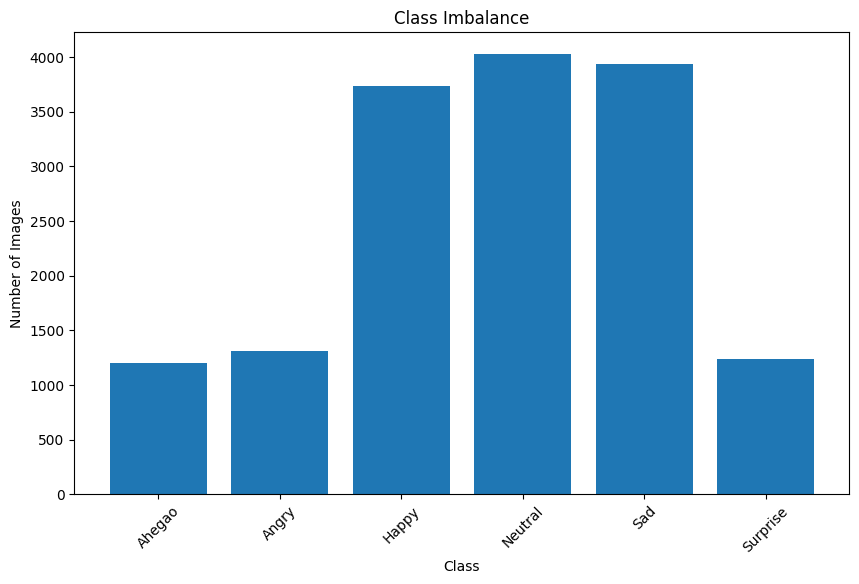

In [2]:
import os
import matplotlib.pyplot as plt

dataset_dir = 'dataset'  # Path to your dataset directory

class_counts = {}  # Dictionary to store class counts

# Iterate through class folders
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        class_count = len(os.listdir(class_path))
        class_counts[class_name] = class_count

# Print class counts
print("Class Counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Plot class imbalance
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


## Now lets try adding class wieghts to our model as the we dont have equal data for each class

In [6]:
import time

model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


import time

# Start the timer
start_time = time.time()

# Iterate through class folders
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        class_count = len(os.listdir(class_path))
        class_counts[class_name] = class_count

# Print class counts
print("Class Counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

total_samples = sum(class_counts.values())
class_weights = {train_generator.class_indices[class_name]: total_samples / (len(class_counts) * count) for class_name, count in class_counts.items()}
print("Class Weights:")
for class_name, weight in class_weights.items():
    print(f"{class_name}: {weight:.2f}")
    
# Train the model with class weights
history = model1.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weights
)

# End the timer
end_time = time.time()

# Calculate the total training time
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")

# Evaluate the model
loss, accuracy = model1.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')


Class Counts:
Ahegao: 1205 images
Angry: 1313 images
Happy: 3740 images
Neutral: 4027 images
Sad: 3934 images
Surprise: 1234 images
Class Weights:
0: 2.14
1: 1.96
2: 0.69
3: 0.64
4: 0.65
5: 2.09
Epoch 1/10
194/194 [==============================] - 126s 637ms/step - loss: 1.6616 - accuracy: 0.2527 - val_loss: 1.5145 - val_accuracy: 0.3416
Epoch 2/10
194/194 [==============================] - 123s 634ms/step - loss: 1.4407 - accuracy: 0.3551 - val_loss: 1.4496 - val_accuracy: 0.3718
Epoch 3/10
194/194 [==============================] - 123s 631ms/step - loss: 1.3632 - accuracy: 0.3761 - val_loss: 1.4104 - val_accuracy: 0.3828
Epoch 4/10
194/194 [==============================] - 122s 626ms/step - loss: 1.2867 - accuracy: 0.4159 - val_loss: 1.3603 - val_accuracy: 0.4514
Epoch 5/10
194/194 [==============================] - 124s 640ms/step - loss: 1.2311 - accuracy: 0.4377 - val_loss: 1.3175 - val_accuracy: 0.4673
Epoch 6/10
194/194 [==============================] - 122s 630ms/step - los

## Adding class weights did not give any improvement. Now we will try running 20 epochs with better image size and aslo early stopping so if our accuracy is decreading we can stop early and also we will try changing the structure of the model where we change the number of filters in layers.Conv2D


In [3]:
import time
from tensorflow.keras.callbacks import EarlyStopping# Define image size and batch size
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

image_size2 = (128, 128)
batch_size2 = 64
dataset_dir='dataset'
num_classes=6
# Data Augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting data into training and validation
)

# Load and split the dataset
train_generator2 = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size2,
    batch_size=batch_size2,
    class_mode='categorical',
    subset='training'
)

val_generator2 = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size2,
    batch_size=batch_size2,
    class_mode='categorical',
    subset='validation'
)


# Define the CNN model
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model2.fit(
    train_generator2,
    epochs=20,  # Increase the number of epochs to allow early stopping to take effect
    validation_data=val_generator2,
    # class_weight=class_weights,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# End the timer
end_time = time.time()

# Calculate the total training time
training_time2 = end_time - start_time
print(f"Total training time for model2: {training_time2} seconds")

# Evaluate the model
loss, accuracy2 = model.evaluate(val_generator2)
print(f'Validation Accuracy: {accuracy2}')


Found 12365 images belonging to 6 classes.
Found 3088 images belonging to 6 classes.

Epoch 1/20


194/194 [==============================] - 528s 3s/step - loss: 1.6089 - accuracy: 0.2926 - val_loss: 1.5848 - val_accuracy: 0.3293
Epoch 2/20
194/194 [==============================] - 411s 2s/step - loss: 1.4832 - accuracy: 0.3582 - val_loss: 1.5548 - val_accuracy: 0.3964
Epoch 3/20
194/194 [==============================] - 415s 2s/step - loss: 1.4152 - accuracy: 0.3832 - val_loss: 1.5266 - val_accuracy: 0.3812
Epoch 4/20
194/194 [==============================] - 401s 2s/step - loss: 1.3668 - accuracy: 0.4087 - val_loss: 1.4431 - val_accuracy: 0.4129
Epoch 5/20
194/194 [==============================] - 402s 2s/step - loss: 1.3174 - accuracy: 0.4319 - val_loss: 1.4944 - val_accuracy: 0.4621
Epoch 6/20
194/194 [==============================] - 406s 2s/step - loss: 1.2469 - accuracy: 0.4725 - val_loss: 1.2434 - val_accuracy: 0.5240
Epoch 7/20
194/194 [==============================] - 

NameError: name 'model' is not defined

In [4]:
# Evaluate the model
loss, accuracy2 = model2.evaluate(val_generator2)
print(f'Validation Accuracy: {accuracy2}')

49/49 [==============================] - 35s 705ms/step - loss: 0.8548 - accuracy: 0.6584
Validation Accuracy: 0.6583549380302429


In [5]:
from tensorflow.keras.models import save_model

save_model(model2, 'model2.h5')


C:\Users\devas\AppData\Local\Temp\ipykernel_17372\2323252703.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model2, 'model2.h5')


1/1 [==============================] - 0s 196ms/step


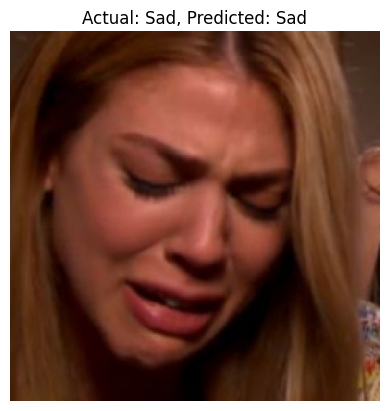

1/1 [==============================] - 0s 52ms/step


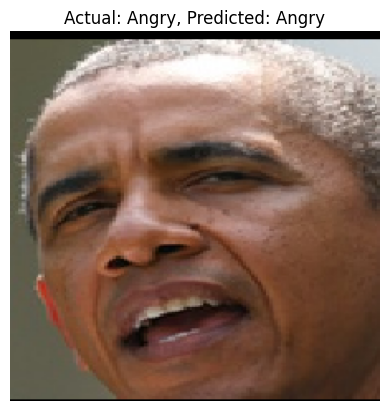

1/1 [==============================] - 0s 47ms/step


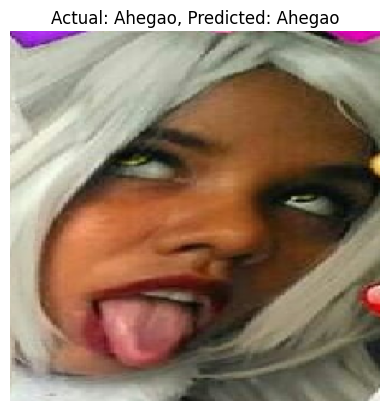

1/1 [==============================] - 0s 42ms/step


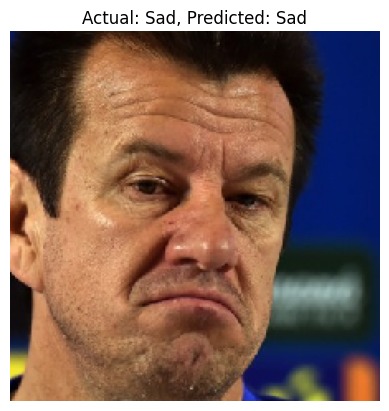

1/1 [==============================] - 0s 48ms/step


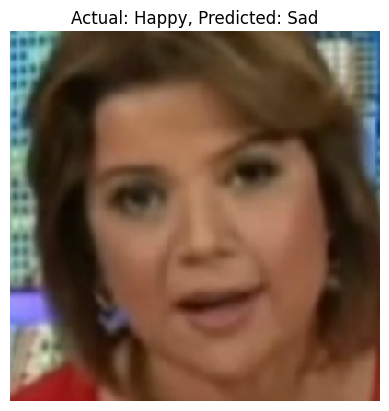

1/1 [==============================] - 0s 44ms/step


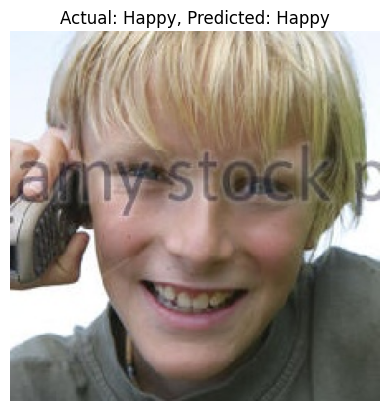

1/1 [==============================] - 0s 46ms/step


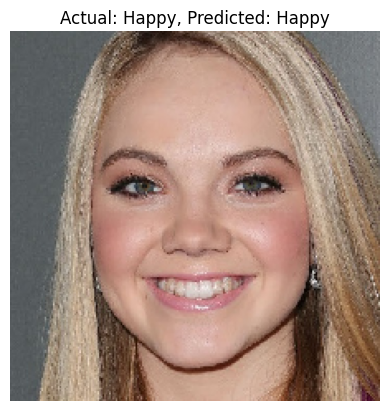

1/1 [==============================] - 0s 53ms/step


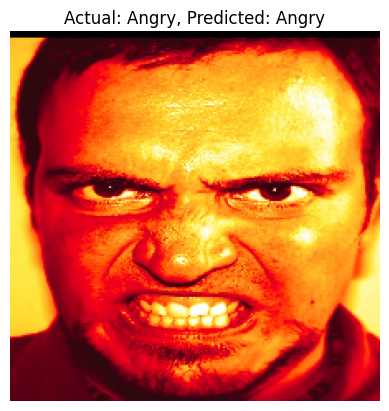

1/1 [==============================] - 0s 66ms/step


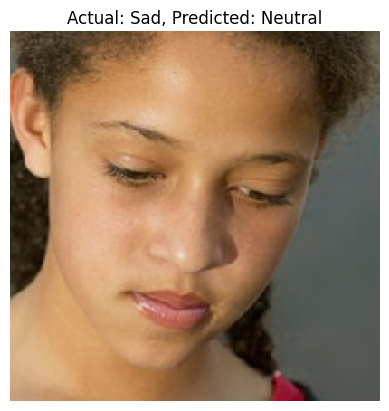

1/1 [==============================] - 0s 37ms/step


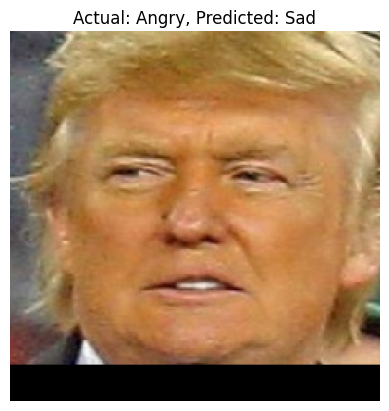

In [9]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Function to load and preprocess an image with resizing
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the class labels
class_labels = list(train_generator2.class_indices.keys())

# Get list of all images
image_files = []
for label in class_labels:
    image_files.extend([os.path.join(label, f) for f in os.listdir(os.path.join('dataset', label))])

# Pick 10 random images
random.seed(42)
selected_images = random.sample(image_files, 10)

# Classify and print the images
for image_path in selected_images:
    actual_class = os.path.basename(os.path.dirname(image_path))  # Extract actual class from directory name
    
    img_array = load_and_preprocess_image(os.path.join('dataset', image_path), target_size=(128, 128))  # Resize to (224, 224)
    
    # Predict the class probabilities
    predictions = model2.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    # Plot the image and print actual/predicted classes
    img = load_img(os.path.join('dataset', image_path), target_size=(224, 224))  # Resize to (224, 224)
    plt.imshow(img)
    plt.title(f'Actual: {actual_class}, Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()


#### Lets try Data Augmentation

In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Function to generate augmented images while preserving directory structure
def generate_augmented_images(datagen, input_dir, output_dir, augment_factor=10):
    # Replicate directory structure
    for root, dirs, files in os.walk(input_dir):
        for dir_name in dirs:
            input_subdir = os.path.join(root, dir_name)
            output_subdir = input_subdir.replace(input_dir, output_dir, 1)
            os.makedirs(output_subdir, exist_ok=True)
            
            # Count original images in the input subdirectory
            original_count = len(os.listdir(input_subdir))
            
            # Generate augmented images for each class
            for file_name in os.listdir(input_subdir):
                if file_name.endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
                    img_path = os.path.join(input_subdir, file_name)
                    img = image.load_img(img_path, target_size=(48, 48))
                    x = image.img_to_array(img)
                    x = x.reshape((1,) + x.shape)
                    
                    # Generate augmented images
                    for i, batch in enumerate(datagen.flow(x, batch_size=1, save_to_dir=output_subdir, save_prefix='aug', save_format='png')):
                        if i >= augment_factor:
                            break
            
            # Count augmented images for each class
            augmented_count = len(os.listdir(output_subdir)) - original_count
            
            # Print counts of original and augmented images for each class
            print(f"Class: {dir_name}\tOriginal Count: {original_count}\tAugmented Count: {augmented_count}")

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=45,
    rescale=1./255
)

# Define input and output directories
input_dir = 'dataset'  # Path to your dataset directory
output_dir = 'augmented_dataset'  # Directory to save augmented images

# Generate augmented images while preserving directory structure
generate_augmented_images(datagen, input_dir, output_dir)


Class: Ahegao	Original Count: 1205	Augmented Count: 6114
Class: Angry	Original Count: 1313	Augmented Count: 6310
Class: Happy	Original Count: 3740	Augmented Count: 6029
Class: Neutral	Original Count: 4027	Augmented Count: 5836
Class: Sad	Original Count: 3934	Augmented Count: 5913
Class: Surprise	Original Count: 1234	Augmented Count: 6188


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import time
from tensorflow.keras.callbacks import EarlyStopping# Define image size and batch size

# Define dataset directory
dataset_dir = 'augmented_dataset'

# Define image size and batch size
image_size = (48, 48)
batch_size = 64

# Data Augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting data into training and validation
)

# Load and split the dataset
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get number of classes
num_classes = len(train_generator.class_indices)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Start the timer
start_time = time.time()
# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)
# End the timer
end_time = time.time()

# Calculate the total training time
training_time0 = end_time - start_time
print(f"Total training time: {training_time0} seconds")
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')



Found 41478 images belonging to 6 classes.
Found 10365 images belonging to 6 classes.



Epoch 1/30


649/649 [==============================] - 178s 270ms/step - loss: 1.6193 - accuracy: 0.3117 - val_loss: 1.4674 - val_accuracy: 0.3967
Epoch 2/30
649/649 [==============================] - 126s 195ms/step - loss: 1.4262 - accuracy: 0.4147 - val_loss: 1.2996 - val_accuracy: 0.4675
Epoch 3/30
649/649 [==============================] - 125s 193ms/step - loss: 1.3086 - accuracy: 0.4712 - val_loss: 1.1965 - val_accuracy: 0.5259
Epoch 4/30
649/649 [==============================] - 127s 196ms/step - loss: 1.2087 - accuracy: 0.5164 - val_loss: 1.1212 - val_accuracy: 0.5539
Epoch 5/30
649/649 [==============================] - 127s 196ms/step - loss: 1.1367 - accuracy: 0.5475 - val_loss: 1.0610 - val_accuracy: 0.5824
Epoch 6/30
649/649 [==============================] - 124s 191ms/step - loss: 1.0814 - accuracy: 0.5720 - val_loss: 0.9987 - val_accuracy: 0.6010
Epoch 7/30
649/649 [============

#### testing the accuracy on our orignal dataset

In [10]:
# Define image size and batch size
image_size2 = (48, 48)
batch_size2 = 64
dataset_dir1='dataset'
datagen1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting data into training and validation
)

# Load and split the dataset
train_generator1 = datagen.flow_from_directory(
    dataset_dir1,
    target_size=image_size2,
    batch_size=batch_size2,
    class_mode='categorical',
    subset='training'
)

val_generator1 = datagen.flow_from_directory(
    dataset_dir1,
    target_size=image_size2,
    batch_size=batch_size2,
    class_mode='categorical',
    subset='validation'
)

# Evaluate the model
loss, accuracy1 = model.evaluate(val_generator1)
print(f'Validation Accuracy: {accuracy1}')

Found 12365 images belonging to 6 classes.
Found 3088 images belonging to 6 classes.
49/49 [==============================] - 21s 417ms/step - loss: 0.8779 - accuracy: 0.6616
Validation Accuracy: 0.6615932583808899


In [7]:
from tensorflow.keras.models import save_model

save_model(model, 'modelaug.h5')

C:\Users\devas\AppData\Local\Temp\ipykernel_18468\2491381937.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'modelaug.h5')


1/1 [==============================] - 0s 31ms/step


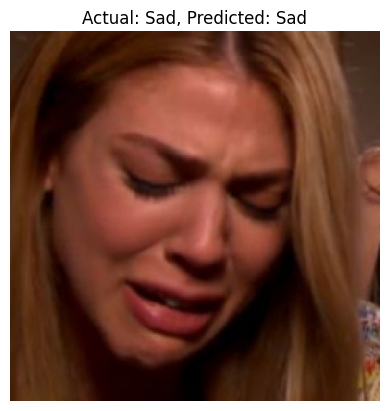

1/1 [==============================] - 0s 31ms/step


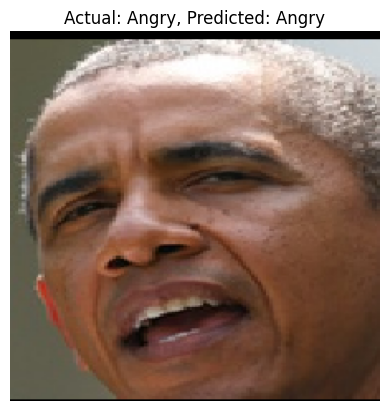

1/1 [==============================] - 0s 48ms/step


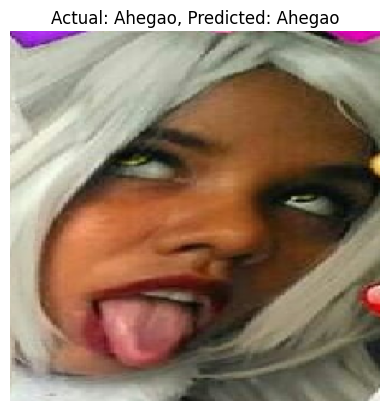

1/1 [==============================] - 0s 54ms/step


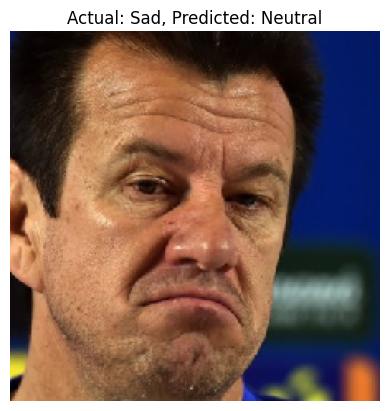

1/1 [==============================] - 0s 39ms/step


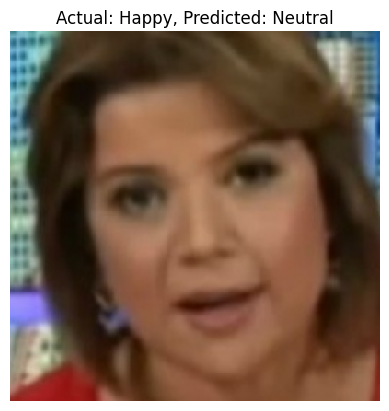

1/1 [==============================] - 0s 41ms/step


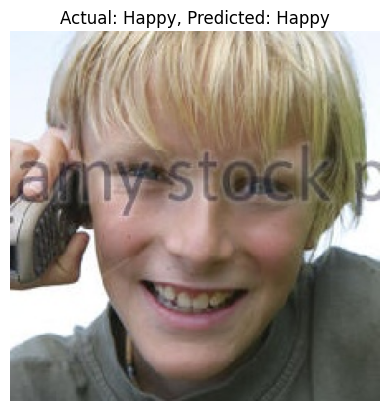

1/1 [==============================] - 0s 34ms/step


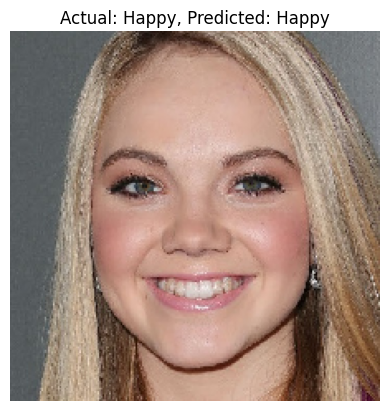

1/1 [==============================] - 0s 39ms/step


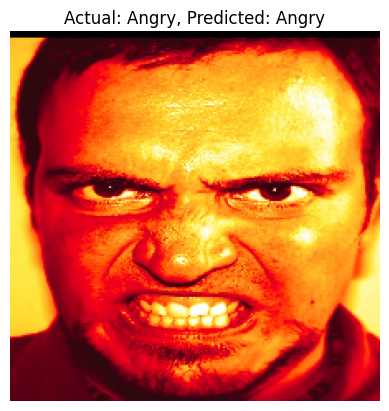

1/1 [==============================] - 0s 51ms/step


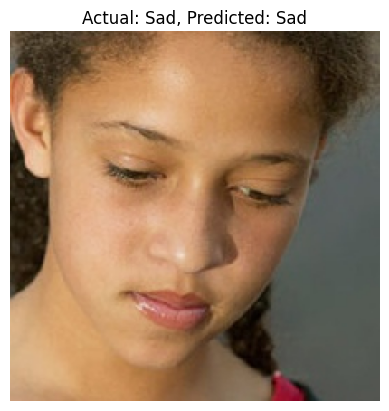

1/1 [==============================] - 0s 40ms/step


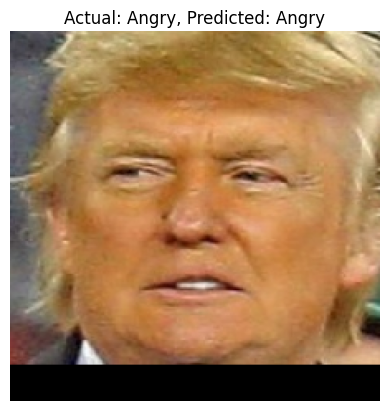

Number of correctly predicted images: 8
Total number of images predictions were made on: 10


In [15]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess an image with resizing
def load_and_preprocess_image(image_path, target_size=(48, 48)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the class labels
class_labels = list(train_generator1.class_indices.keys())

# Get list of all images
image_files = []
for label in class_labels:
    image_files.extend([os.path.join(label, f) for f in os.listdir(os.path.join('dataset', label))])

# Pick 10 random images
random.seed(42)
selected_images = random.sample(image_files, 10)

# Initialize counter for correctly predicted images
correct_predictions = 0

# Classify and print the images
for image_path in selected_images:
    actual_class = os.path.basename(os.path.dirname(image_path))  # Extract actual class from directory name
    
    img_array = load_and_preprocess_image(os.path.join('dataset', image_path), target_size=(48, 48))  # Resize to (224, 224)
    
    # Predict the class probabilities
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    # Check if prediction is correct
    if predicted_class == actual_class:
        correct_predictions += 1
    
    # Plot the image and print actual/predicted classes
    img = load_img(os.path.join('dataset', image_path), target_size=(224, 224))  # Resize to (224, 224)
    plt.imshow(img)
    plt.title(f'Actual: {actual_class}, Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Print the number of correctly predicted images
print(f"Number of correctly predicted images: {correct_predictions}")

# Print the total number of images predictions were made on
total_images = len(selected_images)
print(f"Total number of images predictions were made on: {total_images}")
